# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [52]:
print df_raw.count()
print df_raw.shape

admit       400
gre         398
gpa         398
prestige    399
dtype: int64
(400, 4)


Answer: There are 400 observations

#### Question 2. Create a summary table

In [44]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The data set gre is disperse out than gpa - Standard deviation is a measure of how disperse a data set is and a measure of how close to the mean of the data set that each of the points are. 

#### Question 4. Drop data points with missing data


In [63]:
print df_raw[['gre','gpa', 'prestige']].isnull().sum()

gre         2
gpa         2
prestige    1
dtype: int64


In [109]:
df_new = df_raw.copy()
df_new = df_new.dropna()
df_new.shape

print df_new[['gre','gpa', 'prestige']].isnull().sum()

gre         0
gpa         0
prestige    0
dtype: int64


In [110]:
df_new.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: There are no missing values for the quartile ranges in the summary table, asking for null values gives zero

#### Question 6. Create box plots for GRE and GPA

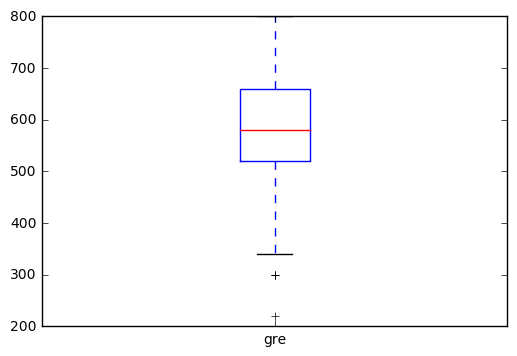

In [84]:
#boxplot 1
df_new['gre'].plot(kind='box')

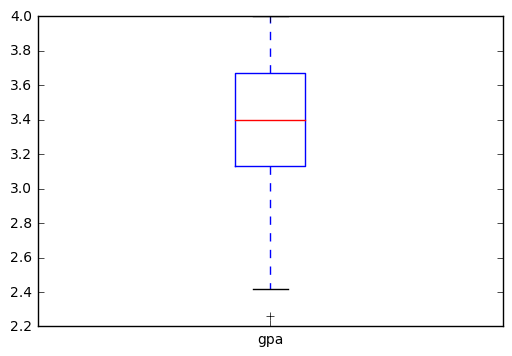

In [85]:
#boxplot 2 
df_new['gpa'].plot(kind='box')

#### Question 7. What do these plots show?

Answer: data set gre has one outlier shown by the cross, gpa has none. The median is indicated by the red horizontal line in the box; the 'whiskers' of the box are a function of the distribution of the data. The upper and lower boundaries of the boxes mark the interquartile rage Q1 - Q3, 50% of the data set is within this range. Since the median line is towards the bottom of the box for gre the data is skewed, more of the observations are at the lower end of the box vs gpa where the data is more normally distributed (median line is at the centre).

#### Question 8. Describe each distribution 

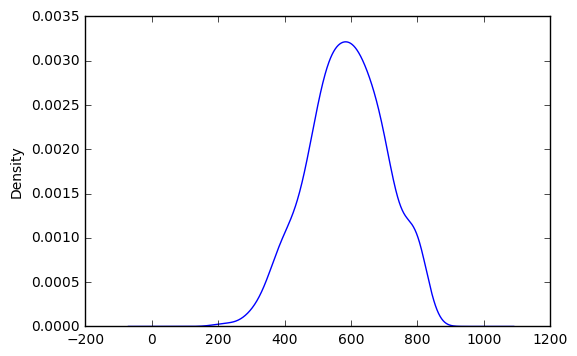

In [99]:
# plot the distribution of each variable 

df_new["gre"].plot(kind="density")
#slightly skewed distribution, could we know from the box plot that the data is skewed and from summary table 
#the median is less than the mean so we have negative skew

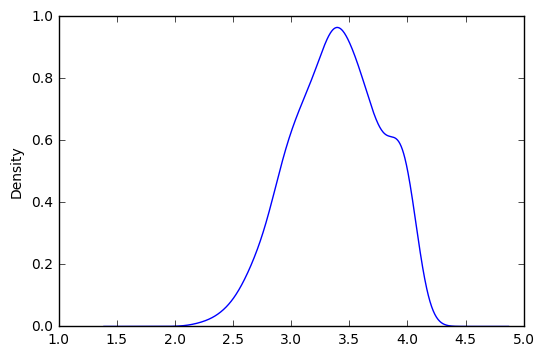

In [100]:
df_new["gpa"].plot(kind="density")
#slightly skewed distribution, could we know from the box plot that the data is skewed and from summary table 
#the median is less than the mean so we have negative skew, although less so than gre

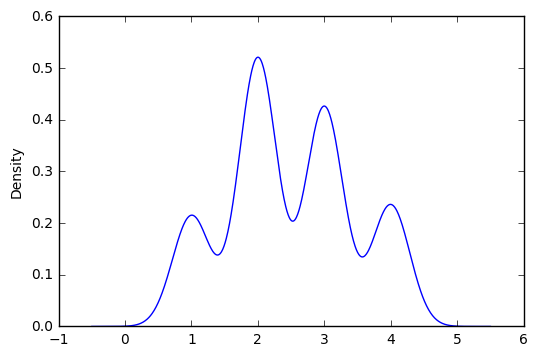

In [106]:
df_new["prestige"].plot(kind="density")
#This is not a normal distribution, it is a categorical variable, there is however some symmetry

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [114]:
print df_new.skew()
print df_new.kurt()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64
admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64


Answer: We can see from the istribution graphs, Skew and Kurtosis findings that the variables gre, gpa and prestige are not normally distributed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: You can clean the data set by removing outliers and data points that may have been incorrectly collected, however for a simple linear model these distrinutions are probable normal enough. Prestige is a categorical variable so will not follow a normal disribution, although there appears to be increments of 0.5. It may be that there is insufficient sampling and a continuous variable is being made to look discrete or that these data points are anomolous and where a prestige score is not a rounded number this should be removed.

#### Question 11. Which of our variables are potentially colinear? 

In [116]:
# create a correlation matrix for the data
df_new.corr()


,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: gre and gpa are potentially colinear which could create a problem in a linear regression model. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Remove the data points that are 0.5 and create dummy vairables; create k-1 dummy variables - in this case we would create variables for Prestige_2, Prestige_3 and Prestiege_4 since 1 is the least common. The pd.get_dummies function would be used. A linear model could then be used as the data would be more noramlly distributed, the summary would reveal if this was a statistically significant finding - p value <0.05 and CI does not cross 0.

#### Question 14. What is your hypothesis? 

Answer: Admission to grad school depends on prestige score

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Answer: Use a version of the following synta 
DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
for example
df_2 = df_raw.dropna(how='any')

#### 2. Bonus: Log transform the skewed data

In [59]:
log_columns = ['gre', 'gpa',]
log_data = df_raw.copy()
log_data[log_columns] = log_data[log_columns].apply(np.log10)

#### 3. Advanced: Impute missing data

In [66]:
df_raw = df_raw.fillna(df_raw.mean())
print df_raw[['gre','gpa', 'prestige']].isnull().sum()

gre         0
gpa         0
prestige    0
dtype: int64
